In [162]:
%load_ext autoreload
%autoreload 2
import os, sys
sys.path.append('..')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("poster")
%load_ext line_profiler
import numpy as np
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [175]:
from src.utils import MERFDataGenerator
from src.merf import MERF

# Test Data Generation

In [90]:
dgm = MERFDataGenerator(m=0.6, sigma_b=2, sigma_e=1)

In [180]:
num_clusters_each_size = 20
train_sizes = [1, 3, 5, 7, 9]
known_sizes = [9, 27, 45, 63, 81]
new_sizes = [10, 30, 50, 70, 90]

In [181]:
train_cluster_sizes = MERFDataGenerator.create_cluster_sizes_array(train_sizes, num_clusters_each_size)
known_cluster_sizes = MERFDataGenerator.create_cluster_sizes_array(known_sizes, num_clusters_each_size)
new_cluster_sizes = MERFDataGenerator.create_cluster_sizes_array(new_sizes, num_clusters_each_size)

In [184]:
len(train_cluster_sizes), len(known_cluster_sizes), len(new_cluster_sizes)

(100, 100, 100)

In [188]:
train, test_known, test_new = dgm.generate_split_samples(train_cluster_sizes, known_cluster_sizes, new_cluster_sizes)

INFO     [utils.py:135] Drew 10000 samples from 200 clusters.
INFO     [utils.py:136] PTEV = 89.21874376470184, PREV = 48.33628352235827.


In [204]:
len(train), len(test_known), len(test_new)

(500, 4500, 5000)

# MERF Training

In [205]:
X_train = train[['X_0', 'X_1', 'X_2']]
Z_train = train[['Z']]
clusters_train = train['cluster']
y_train = train['y']

In [206]:
mrf = MERF(n_estimators=300, max_iterations=200)

In [207]:
mrf.fit(X_train, Z_train, clusters_train, y_train)

INFO     [merf.py:228] GLL is 2140.530465702521 at iteration 1.
INFO     [merf.py:228] GLL is 2203.7975358508675 at iteration 2.
INFO     [merf.py:228] GLL is 2215.042786862288 at iteration 3.
INFO     [merf.py:228] GLL is 2190.2326965800958 at iteration 4.
INFO     [merf.py:228] GLL is 2232.2986035329727 at iteration 5.
INFO     [merf.py:228] GLL is 2207.027167533418 at iteration 6.
INFO     [merf.py:228] GLL is 2197.0384709545438 at iteration 7.
INFO     [merf.py:228] GLL is 2186.382024118318 at iteration 8.
INFO     [merf.py:228] GLL is 2188.03961816068 at iteration 9.
INFO     [merf.py:228] GLL is 2209.6752040569404 at iteration 10.
INFO     [merf.py:228] GLL is 2148.1067081938963 at iteration 11.
INFO     [merf.py:228] GLL is 2203.1877305093058 at iteration 12.
INFO     [merf.py:228] GLL is 2205.4370273828777 at iteration 13.
INFO     [merf.py:228] GLL is 2194.8726458522324 at iteration 14.
INFO     [merf.py:228] GLL is 2180.445309277854 at iteration 15.
INFO     [merf.py:228] GLL

INFO     [merf.py:228] GLL is 2186.666040851794 at iteration 126.
INFO     [merf.py:228] GLL is 2192.223133346737 at iteration 127.
INFO     [merf.py:228] GLL is 2203.9035495340263 at iteration 128.
INFO     [merf.py:228] GLL is 2197.5557473394797 at iteration 129.
INFO     [merf.py:228] GLL is 2254.2714567166972 at iteration 130.
INFO     [merf.py:228] GLL is 2214.3988012530995 at iteration 131.
INFO     [merf.py:228] GLL is 2209.140827083886 at iteration 132.
INFO     [merf.py:228] GLL is 2204.9482453798432 at iteration 133.
INFO     [merf.py:228] GLL is 2179.790480407146 at iteration 134.
INFO     [merf.py:228] GLL is 2173.086400197064 at iteration 135.
INFO     [merf.py:228] GLL is 2200.1636662582537 at iteration 136.
INFO     [merf.py:228] GLL is 2192.4652420514394 at iteration 137.
INFO     [merf.py:228] GLL is 2216.5364780527593 at iteration 138.
INFO     [merf.py:228] GLL is 2178.3084362713757 at iteration 139.
INFO     [merf.py:228] GLL is 2209.883069803349 at iteration 140.
I

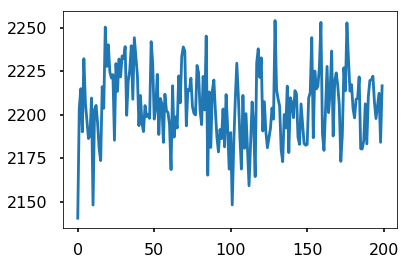

In [208]:
plt.plot(mrf.gll_history)

# MERF Prediction

In [211]:
X_known = test_known[['X_0', 'X_1', 'X_2']]
Z_known = test_known[['Z']]
clusters_known = test_known['cluster']
y_known = test_known['y']

In [212]:
y_hat_known = mrf.predict(X_known, Z_known, clusters_known)

In [213]:
assert len(y_hat_known) == len(y_known)

In [214]:
X_new = test_new[['X_0', 'X_1', 'X_2']]
Z_new = test_new[['Z']]
clusters_new = test_new['cluster']
y_new = test_new['y']

In [215]:
y_hat_new = mrf.predict(X_new, Z_new, clusters_new)

In [216]:
assert len(y_hat_new) == len(y_new)

# MERF Accuracy

In [219]:
# Train and test using classic random forest. 
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [220]:
rf = RandomForestRegressor(n_estimators=300, n_jobs=-1)

In [221]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [222]:
y_hat_known_rf = rf.predict(X_known)

In [223]:
pmse_rf = np.mean((y_known - y_hat_known_rf) ** 2)
pmse_rf

5.8458442169264098

In [224]:
y_hat_known_merf = mrf.predict(X_known, Z_known, clusters_known)

In [225]:
pmse_merf = np.mean((y_known - y_hat_known_merf) ** 2)
pmse_merf

7.7212145567447035